In [ ]:
#Importación de las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargamos los datos de los csv a las variables
ordenes = pd.read_csv('/content/sample_data/orders.csv')
ordenes_producto_prior = pd.read_csv('/content/sample_data/order_products__prior.csv')
productos = pd.read_csv('/content/sample_data/products.csv')

In [ ]:
#Unimos las tablas para obtener datos de productos por usuario, por medio de merge
datos_unidos = pd.merge(ordenes_producto_prior, ordenes[['order_id', 'user_id', 'order_dow', 'order_hour_of_day']], on='order_id')
datos_unidos = pd.merge(datos_unidos, productos[['product_id', 'product_name']], on='product_id')

In [ ]:
#Agrupamos por usuario para calcular el total de productos comprados y frecuencia de reordenes
datos_usuario = datos_unidos.groupby('user_id').agg({
                                                                      'product_id': 'count',
                                                                      'reordered': 'mean',
                                                                      'order_dow':'mean',
                                                                      'order_hour_of_day':'mean'
                                                                    }).rename(columns={
                                                                      'product_id': 'total_products',
                                                                      'reordered': 'reorder_frequency',
                                                                      'order_dow':'avg_day_of_week',
                                                                      'order_hour_of_day':'avg_hour_of_day'
                                                                    }).reset_index()

In [ ]:
#Realizamos un escalado de datos
scaler = StandardScaler()
datos_usuario_scaled = scaler.fit_transform(datos_usuario[['total_products', 'reorder_frequency', 'avg_day_of_week', 'avg_hour_of_day']])

In [ ]:
#Método del codo para encontrar el mejor número de clústeres o grupos
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_usuario_scaled)
    sse.append(kmeans.inertia_)


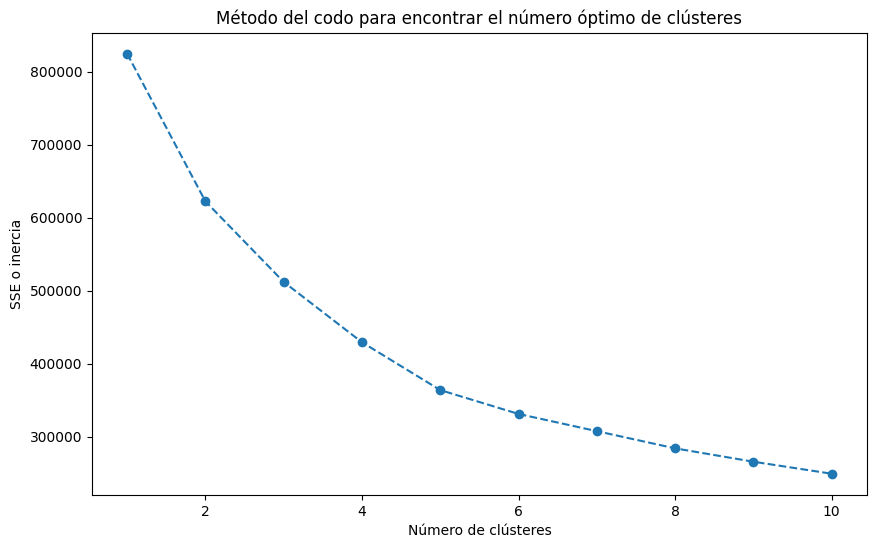

In [ ]:
#Graficamos para ver qué número de clústeres es mejor
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Método del codo para encontrar el número óptimo de clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('SSE o inercia')
plt.show()



In [ ]:
#Definimos la cantidad de clústeres o grupos para el modelo KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
datos_usuario['cluster'] = kmeans.fit_predict(datos_usuario_scaled)

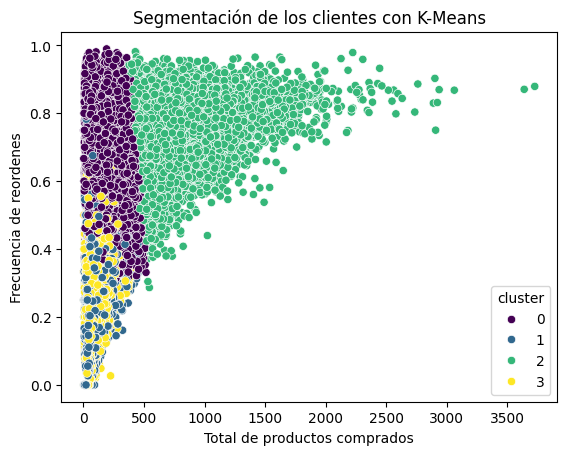

In [ ]:
#Graficamos KMeans con sus clústeres o grupos
sns.scatterplot(x='total_products', y='reorder_frequency', hue='cluster', data=datos_usuario, palette='viridis')
plt.title('Segmentación de los clientes con K-Means')
plt.xlabel('Total de productos comprados')
plt.ylabel('Frecuencia de reordenes')
plt.show()

Después de realizar el modelo de KMeans, podemos notar en la gráfica que hay grupos notorios de clientes, es decir, hay varios tipos de clientes que compran en Instakart:
1. Los que compran pocos productos pero hacen muchas reordenes (Grupo/Cluster 0).
2. Los que tienen una cantidad de reordenes baja y compras bajas (Grupo/Cluster 1).
3. Los que realizan muchas compras y a la vez hacen muchas reordenes (Grupo/Cluster 2).
4. Los que realizan compras y reordenes de forma moderada (Grupo/Cluster 3).

Los grupos 1 y 3 parecen tener características similares.

Los grupos 0 y 2 poseen características bastante notorias, y a su vez son muy diferentes a los grupos 1 y 3.

Esto nos servirá para que instacart pueda visualizar los diferentes grupos de clientes que posee, para así saber qué acciones debe tomar en cada grupo. Por ejemplo, al grupo de clientes del grupo 0 se le puede ofrecer promociones para que compren más productos, al grupo 2 se le puede otorgar recompensas por ser fieles a la tienda para retenerlos, etc.

In [ ]:
#importar librería necesarias
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#Cargamos los datos que vamos a ocupar
aisles = pd.read_csv('/content/sample_data/aisles.csv')
ordenes_producto_train = pd.read_csv('/content/sample_data/order_products__train.csv')
productos = pd.read_csv('/content/sample_data/products.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Unimos los datos de los productos con los pedidos, usando merge
datos_unidos2 = ordenes_producto_train.merge(productos, on='product_id')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Creamos una "cesta" que permitirá almacenar cada pedido y producto, pero antes agrupamos y transformamos los datos
cesta = datos_unidos2.groupby(['order_id', 'product_name'])['product_id'].count().unstack().reset_index().fillna(0).set_index('order_id')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-71f562a0fb54>:2: PerformanceWarning: The following operation may generate 5133289707 cells in the resulting pandas object.
  cesta = datos_unidos2.groupby(['order_id', 'product_name'])['product_id'].count().unstack().reset_index().fillna(0).set_index('order_id')


In [ ]:
#Conversión a binario para indicar presencia o ausencia
cesta = cesta.applymap(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-7859cd7180d9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cesta = cesta.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
#Aplicamos el algoritmo de apriori para poder identificar combinaciones de productos frecuentes
combinaciones_productos_frecuentes = apriori(cesta, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#Calcular las reglas de asociación basadas en los productos frecuentes
reglas = association_rules(combinaciones_productos_frecuentes, metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Filtrar reglas utilizando una confianza alta para obtener las combinaciones más importantes
reglas_alta_confianza = reglas[reglas['confidence'] > 0.1]
reglas_alta_confianza.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bag of Organic Bananas),(Organic Baby Spinach),0.118975,0.075173,0.016912,0.142146,1.890915,0.007968,1.078071,0.534781
1,(Organic Baby Spinach),(Bag of Organic Bananas),0.075173,0.118975,0.016912,0.224972,1.890915,0.007968,1.136765,0.509453
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.118975,0.054118,0.018011,0.151386,2.797328,0.011572,1.114620,0.729282
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.054118,0.118975,0.018011,0.332813,2.797328,0.011572,1.320506,0.679277
4,(Bag of Organic Bananas),(Organic Raspberries),0.118975,0.040166,0.013952,0.117271,2.919672,0.009174,1.087348,0.746285


In [ ]:
#Filtrar reglas de alto lift
reglas_alto_lift = reglas[reglas['lift'] > 1.5]
reglas_alto_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bag of Organic Bananas),(Organic Baby Spinach),0.118975,0.075173,0.016912,0.142146,1.890915,0.007968,1.078071,0.534781
1,(Organic Baby Spinach),(Bag of Organic Bananas),0.075173,0.118975,0.016912,0.224972,1.890915,0.007968,1.136765,0.509453
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.118975,0.054118,0.018011,0.151386,2.797328,0.011572,1.114620,0.729282
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.054118,0.118975,0.018011,0.332813,2.797328,0.011572,1.320506,0.679277
4,(Bag of Organic Bananas),(Organic Raspberries),0.118975,0.040166,0.013952,0.117271,2.919672,0.009174,1.087348,0.746285


Se realizó un análisis de canasta, con el fin de que la empresa Instacart pueda comprender los patrones en la selección de productos por parte de los diferentes compradores, con el fin de que pueda conocer cuáles artículos se compran juntos con frecuencia. Podremos incluso determinar qué tan probable es que un comprador compre un producto en base a uno ya comprado. Esto es útil para que la empresa pueda establecer estrategias de marketing, obtener nuevas oportunidades de venta, personalizar las recomendaciones de los compradores, etc.
En este caso podemos ver que los compradores compran productos orgánicos en conjunto, entonces, si el cliente compra un producto orgánico, es probable que luego compre otro producto orgánico (si compra espinaca orgánica, es muy probable que compre plátanos orgánicos u otros productos orgánicos).